# Binary Classification with a Tabular Kidney Stone Prediction Dataset

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('111.csv')

In [3]:
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [5]:
import seaborn as sns

<Axes: xlabel='urea'>

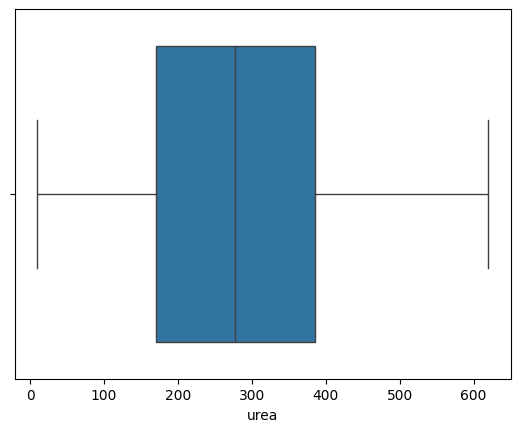

In [6]:
sns.boxplot(x=df['urea'])

<Axes: xlabel='gravity'>

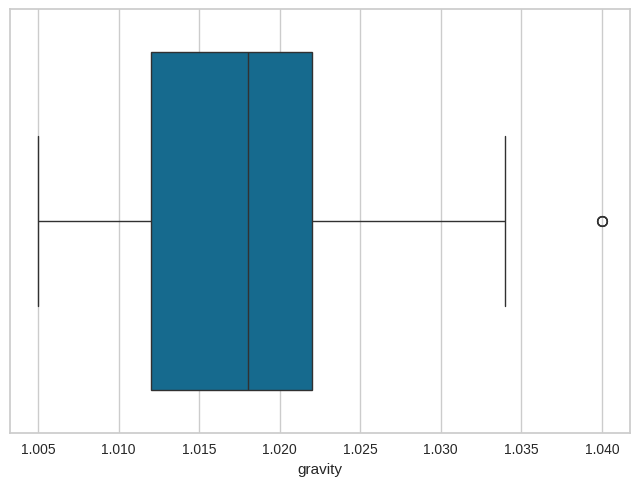

In [30]:
sns.boxplot(x=df['gravity'])

<Axes: xlabel='cond'>

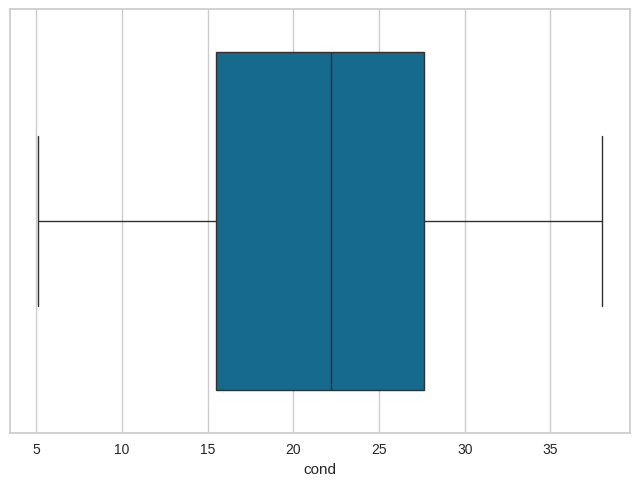

In [29]:
sns.boxplot(x=df['cond'])

In [7]:
del df['id']

In [7]:
#pip install pycaret

In [9]:
from pycaret.classification import *

In [10]:
setup(data=df,target='target')

,Description,Value
0,Session id,8284
1,Target,target
2,Target type,Binary
3,Original data shape,"(414, 7)"
4,Transformed data shape,"(414, 7)"
5,Transformed train set shape,"(289, 7)"
6,Transformed test set shape,"(125, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [11]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7265,0.7629,0.6494,0.7294,0.6753,0.4426,0.4555,0.1970
lightgbm,Light Gradient Boosting Machine,0.7128,0.7277,0.6801,0.6791,0.6730,0.4183,0.4232,0.4490
lda,Linear Discriminant Analysis,0.7090,0.7802,0.5237,0.7532,0.6082,0.3918,0.4132,0.0330
rf,Random Forest Classifier,0.7058,0.7751,0.6500,0.6962,0.6607,0.4035,0.4149,0.2390
ada,Ada Boost Classifier,0.7057,0.6942,0.6346,0.6939,0.6512,0.4002,0.4105,0.1410
xgboost,Extreme Gradient Boosting,0.6989,0.7184,0.6571,0.6820,0.6507,0.3895,0.4066,0.1300
qda,Quadratic Discriminant Analysis,0.6986,0.7533,0.5391,0.7193,0.6057,0.3738,0.3897,0.0400
gbc,Gradient Boosting Classifier,0.6986,0.7526,0.6250,0.6808,0.6444,0.3852,0.3917,0.1540
lr,Logistic Regression,0.6985,0.7686,0.5314,0.7230,0.6033,0.3724,0.3888,0.7210
ridge,Ridge Classifier,0.6916,0.7663,0.5154,0.7173,0.5917,0.3570,0.3739,0.0650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

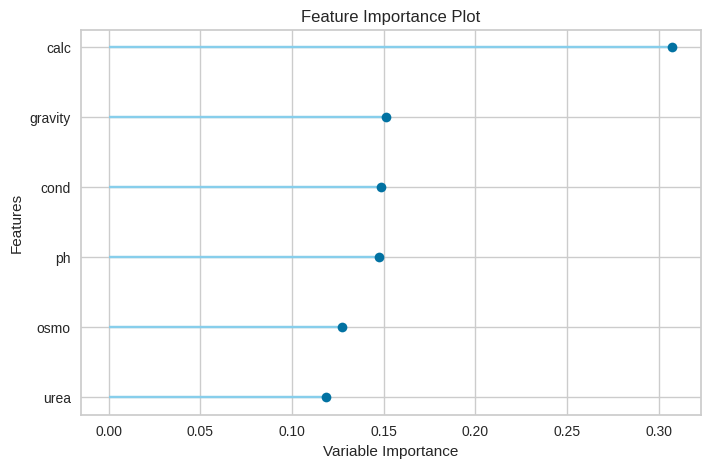

In [28]:
plot_model(best_model,plot='feature')

In [12]:
df.isnull().sum()

,0
gravity,0
ph,0
osmo,0
cond,0
urea,0
calc,0
target,0


In [13]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [14]:
df.corr(numeric_only=True)

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


<Axes: >

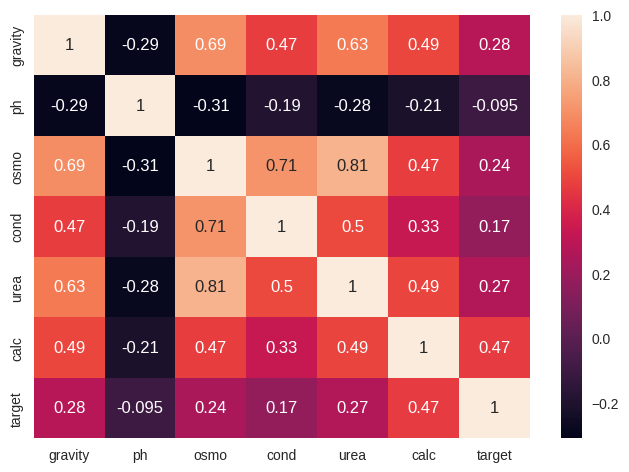

In [15]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [16]:
abs(df.corr(numeric_only=True)['target']).sort_values(ascending=False)

,target
target,1.000000
calc,0.467439
gravity,0.282577
urea,0.265211
osmo,0.244770
cond,0.172224
ph,0.094983


In [8]:
x=df.drop('target',axis=1)
y=df['target']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()



        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [36]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,3.147230e-01,4.132310e-01,3.048452e-01
Gradient Boosting,3.114911e-01,4.142043e-01,3.133079e-01
Ridge,2.708329e-01,4.262588e-01,3.629784e-01
mlp_regressor,2.546145e-01,4.309732e-01,3.816931e-01
Linear,2.534669e-01,4.313048e-01,3.657629e-01
KNeighborsRegressor,2.395146e-01,4.353166e-01,4.193411e-01
ElasticNet,1.237816e-01,4.672679e-01,4.488470e-01
Lasso,1.224474e-01,4.676236e-01,4.499050e-01
AdaBoost,8.959869e-02,4.762952e-01,3.971429e-01
SVR,-8.346653e-03,5.012619e-01,4.024028e-01


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [13]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [14]:
tahmin=gb.predict(x_test)

In [15]:
accuracy_score(tahmin,y_test)

0.7951807228915663